In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline


None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [197]:
df = pd.read_csv("IQ_level.csv")

In [159]:
df.columns

Index(['rank', 'country', 'IQ', 'education_expenditure', 'avg_income',
       'avg_temp'],
      dtype='object')

In [199]:
df['IQ'] = pd.to_numeric(df['IQ'], errors='coerce')
df['education_expenditure'] = pd.to_numeric(df['education_expenditure'], errors='coerce')
df['avg_income'] = pd.to_numeric(df['avg_income'], errors='coerce')
df['avg_temp'] = pd.to_numeric(df['avg_temp'], errors='coerce')

# Drop rows with NaN values if necessary (or you can fill NaNs if preferred)
df = df.dropna(subset=['IQ', 'education_expenditure', 'avg_income', 'avg_temp'])

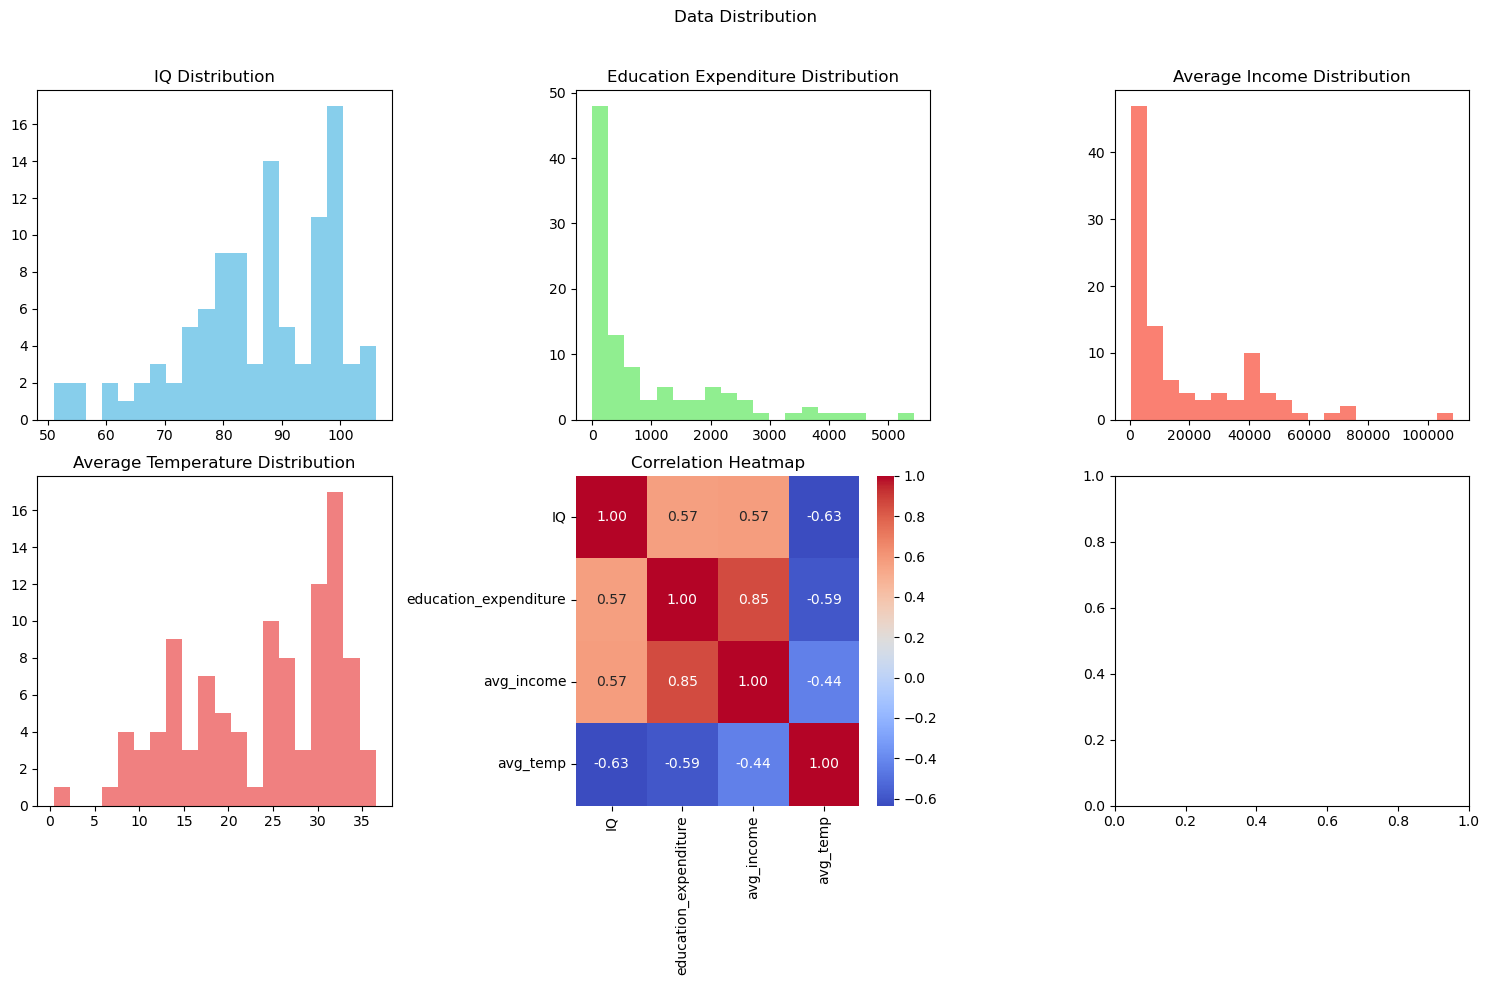

In [201]:
# Step 1: Visualize the distribution of the main variables

# Plot histograms for each variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Data Distribution")

# IQ distribution
axes[0, 0].hist(df['IQ'], bins=20, color='skyblue')
axes[0, 0].set_title('IQ Distribution')

# Education expenditure distribution
axes[0, 1].hist(df['education_expenditure'], bins=20, color='lightgreen')
axes[0, 1].set_title('Education Expenditure Distribution')

# Average income distribution
axes[0, 2].hist(df['avg_income'], bins=20, color='salmon')
axes[0, 2].set_title('Average Income Distribution')

# Average temperature distribution
axes[1, 0].hist(df['avg_temp'], bins=20, color='lightcoral')
axes[1, 0].set_title('Average Temperature Distribution')

# Step 2: Compute the correlation matrix
correlation_matrix = df[['IQ', 'education_expenditure', 'avg_income', 'avg_temp']].corr()

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [203]:
temperature_iq_correlation = df['avg_temp'].corr(df['IQ'])

print(f"Correlation between avg_temp and IQ: {temperature_iq_correlation}")

Correlation between avg_temp and IQ: -0.6346530951134732


Linear regression equation: IQ = -0.95 * avg_temp + 108.62


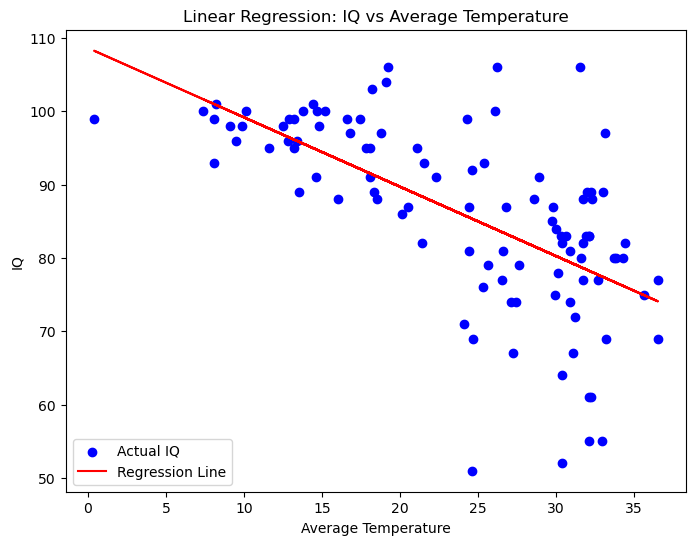

In [205]:
from sklearn.linear_model import LinearRegression
import numpy as np
# Reshape the data for regression (scikit-learn requires 2D arrays for the features)
X = df[['avg_temp']].values.reshape(-1, 1)  # Feature (avg_temp)
y = df['IQ']  # Target (IQ)

# Create a Linear Regression model and fit it
model = LinearRegression()
model.fit(X, y)

# Get the regression line parameters
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear regression equation: IQ = {slope:.2f} * avg_temp + {intercept:.2f}")

# Predict IQ values based on the model
df['predicted_IQ'] = model.predict(X)

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['avg_temp'], df['IQ'], color='blue', label='Actual IQ')
plt.plot(df['avg_temp'], df['predicted_IQ'], color='red', label='Regression Line')
plt.xlabel('Average Temperature')
plt.ylabel('IQ')
plt.title('Linear Regression: IQ vs Average Temperature')
plt.legend()
plt.show()

In [207]:
# Calculate R-squared value
r_squared = model.score(X, y)
print(f"R-squared value: {r_squared:.4f}")

# This tells us how much of the variance in IQ is explained by average temperature


R-squared value: 0.4028


In [209]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 3: Multiple Linear Regression to predict IQ based on avg_income and avg_temp

# Select both predictors: avg_income and avg_temp
X_multiple = df[['avg_temp', 'avg_income']].values  # Features (avg_temp, avg_income)
y = df['IQ']  # Target (IQ)

# Create a Linear Regression model and fit it
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)

# Get the regression line parameters
slope_temp = model_multiple.coef_[0]
slope_income = model_multiple.coef_[1]
intercept = model_multiple.intercept_

print(f"Multiple regression equation: IQ = {slope_temp:.2f} * avg_temp + {slope_income:.2f} * avg_income + {intercept:.2f}")

# Predict IQ values based on the model
df['predicted_IQ_multiple'] = model_multiple.predict(X_multiple)

# Calculate R-squared value for the multiple regression model
r_squared_multiple = model_multiple.score(X_multiple, y)
print(f"R-squared value (multiple regression): {r_squared_multiple:.4f}")


Multiple regression equation: IQ = -0.71 * avg_temp + 0.00 * avg_income + 99.13
R-squared value (multiple regression): 0.5108


In [215]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Step: Simple Linear Regression to predict IQ based on avg_income

# Feature: avg_income
X_income = df[['avg_income']].values  # Feature (avg_income)
y = df['IQ']  # Target (IQ)

# Create a Linear Regression model and fit it
model_income = LinearRegression()
model_income.fit(X_income, y)

# Get the regression line parameters
slope_income = model_income.coef_[0]
intercept_income = model_income.intercept_

print(f"Simple regression equation: IQ = {slope_income:.2f} * avg_income + {intercept_income:.2f}")

# Predict IQ values based on the model
df['predicted_IQ_income'] = model_income.predict(X_income)

# Calculate R-squared value for the simple regression model
r_squared_income = model_income.score(X_income, y)
print(f"R-squared value (income-only regression): {r_squared_income:.4f}")


Simple regression equation: IQ = 0.00 * avg_income + 80.10
R-squared value (income-only regression): 0.3278


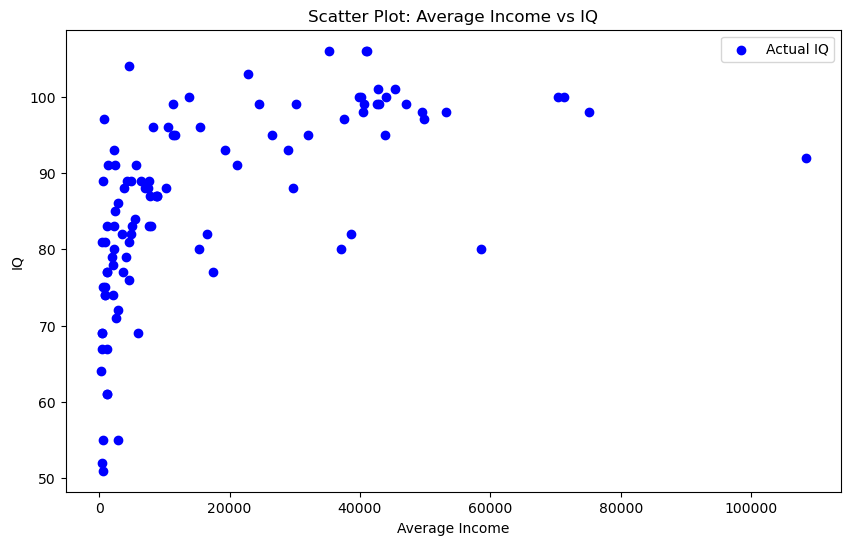

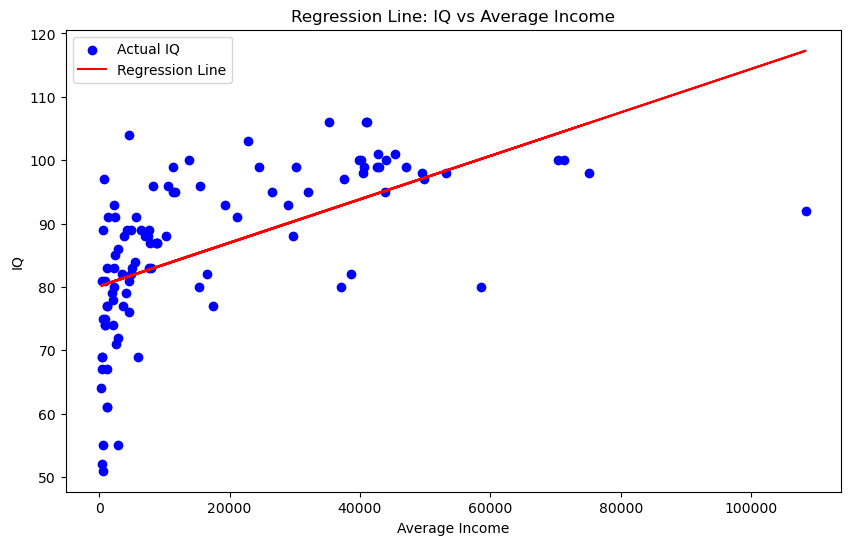

TypeError: residplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1000x600 with 0 Axes>

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step: Visualizing the relationship between avg_income and IQ

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_income'], df['IQ'], color='blue', label='Actual IQ')
plt.xlabel('Average Income')
plt.ylabel('IQ')
plt.title('Scatter Plot: Average Income vs IQ')
plt.legend()
plt.show()

# Regression Line Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_income'], df['IQ'], color='blue', label='Actual IQ')
plt.plot(df['avg_income'], df['predicted_IQ_income'], color='red', label='Regression Line')
plt.xlabel('Average Income')
plt.ylabel('IQ')
plt.title('Regression Line: IQ vs Average Income')
plt.legend()
plt.show()

# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(df['avg_income'], df['IQ'])
plt.xlabel('Average Income')
plt.ylabel('Residuals')
plt.title('Residual Plot: IQ vs Average Income')
plt.show()


Multiple regression equation: IQ = -0.71 * avg_temp + 0.00 * avg_income + 99.13
R-squared value (multiple regression with both): 0.5108


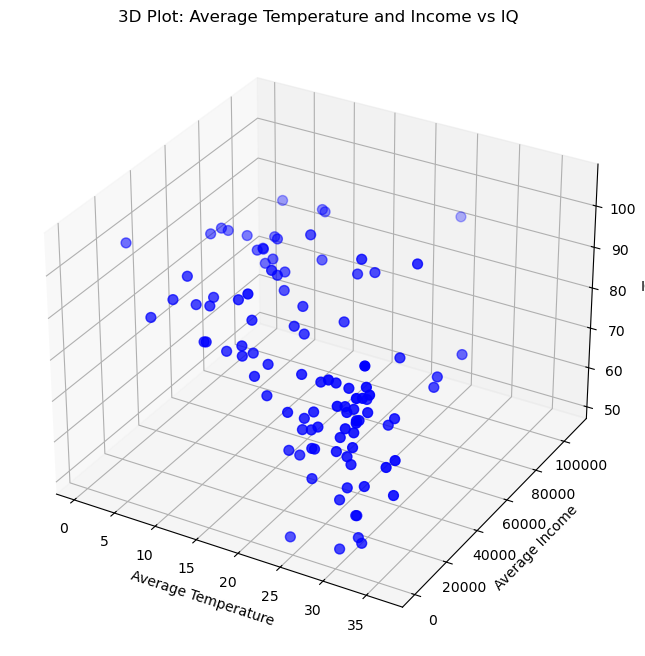

In [217]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Multiple Linear Regression to predict IQ based on both avg_temp and avg_income

# Features: avg_temp and avg_income
X_both = df[['avg_temp', 'avg_income']].values  # Features
y = df['IQ']  # Target (IQ)

# Create and fit the model
model_both = LinearRegression()
model_both.fit(X_both, y)

# Get the regression parameters
slope_temp = model_both.coef_[0]
slope_income = model_both.coef_[1]
intercept_both = model_both.intercept_

print(f"Multiple regression equation: IQ = {slope_temp:.2f} * avg_temp + {slope_income:.2f} * avg_income + {intercept_both:.2f}")

# Predict IQ values based on the model
df['predicted_IQ_both'] = model_both.predict(X_both)

# Calculate R-squared value for the model
r_squared_both = model_both.score(X_both, y)
print(f"R-squared value (multiple regression with both): {r_squared_both:.4f}")

# Visualize the relationship

# 3D Plot for avg_temp and avg_income vs IQ
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['avg_temp'], df['avg_income'], df['IQ'], c='blue', label='Actual IQ', s=50)
ax.set_xlabel('Average Temperature')
ax.set_ylabel('Average Income')
ax.set_zlabel('IQ')
ax.set_title('3D Plot: Average Temperature and Income vs IQ')
plt.show()
